# Exploratory Data Analysis - Insurance Risk Analytics

This notebook contains exploratory data analysis for the insurance risk analytics project.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Matplotlib inline for Jupyter notebooks
%matplotlib inline

# Add src to path
sys.path.append(str(Path('..') / 'src'))

from utils.config import RAW_DATA_DIR, PROCESSED_DATA_DIR


## Load Data


In [22]:
# Load raw data
data_path = RAW_DATA_DIR / 'insurance.csv'

if data_path.exists():
    df = pd.read_csv(data_path)
    
    # For this dataset, 'charges' represents insurance costs
    # We can treat it as claims for analysis purposes
    # If you have actual data with TransactionMonth, TotalClaims, TotalPremium, uncomment below:
    # if 'TransactionMonth' in df.columns:
    #     df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
    # if 'TotalClaims' in df.columns and 'TotalPremium' in df.columns:
    #     df['loss_ratio'] = df['TotalClaims'] / df['TotalPremium'].replace(0, np.nan)
    
    print(f"Data loaded: {df.shape}")
    print(df.head())
    print(f"\nColumns: {list(df.columns)}")
    print(f"\nData types:\n{df.dtypes}")
else:
    print(f"Data file not found at {data_path}")
    print("Please add insurance.csv to data/raw/ and track with DVC")


Data loaded: (1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## Data Overview


In [23]:
if 'df' in locals() and not df.empty:
    print("Dataset Info:")
    print(df.info())
    print("\nSummary Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.69

## Visualizations

Create your EDA visualizations here. Aim for at least 3 creative plots that provide insights.


C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_2196\437885246.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_charges = df.groupby('BMI_Category')['charges'].mean().sort_values()


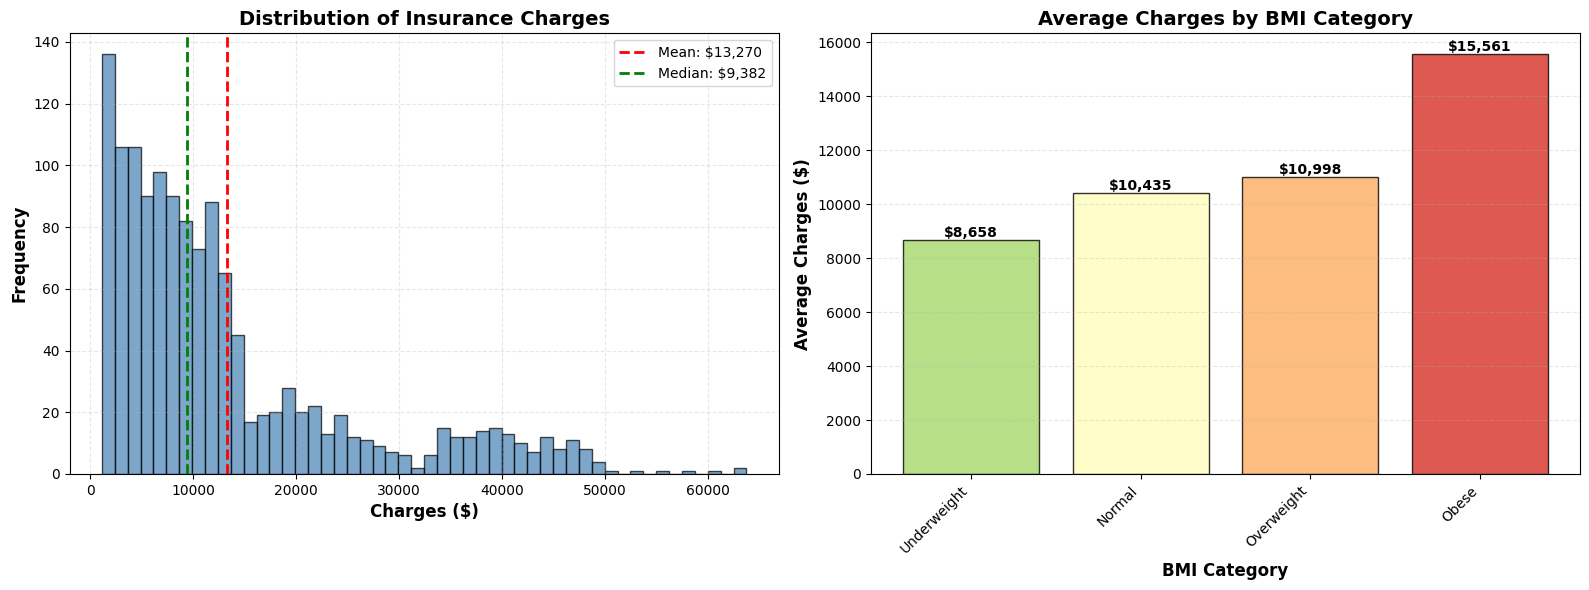

Average charges by BMI category:
BMI_Category
Underweight     8657.620652
Normal         10435.440719
Overweight     10997.803881
Obese          15560.926321
Name: charges, dtype: float64


In [24]:
# Creative Plot 2: Distribution of Charges with BMI Overlay
if 'df' in locals() and not df.empty:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Left: Distribution of charges
    ax1.hist(df['charges'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    ax1.axvline(df['charges'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: ${df["charges"].mean():,.0f}')
    ax1.axvline(df['charges'].median(), color='green', linestyle='--', linewidth=2, 
                label=f'Median: ${df["charges"].median():,.0f}')
    ax1.set_xlabel('Charges ($)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax1.set_title('Distribution of Insurance Charges', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(alpha=0.3, linestyle='--')
    
    # Right: Charges by BMI categories
    df['BMI_Category'] = pd.cut(df['bmi'], 
                                bins=[0, 18.5, 25, 30, np.inf],
                                labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    bmi_charges = df.groupby('BMI_Category')['charges'].mean().sort_values()
    
    colors_bmi = plt.cm.RdYlGn_r(np.linspace(0.3, 0.9, len(bmi_charges)))
    bars = ax2.bar(range(len(bmi_charges)), bmi_charges.values, color=colors_bmi, 
                    edgecolor='black', alpha=0.8)
    ax2.set_xlabel('BMI Category', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Average Charges ($)', fontsize=12, fontweight='bold')
    ax2.set_title('Average Charges by BMI Category', fontsize=14, fontweight='bold')
    ax2.set_xticks(range(len(bmi_charges)))
    ax2.set_xticklabels(bmi_charges.index, rotation=45, ha='right')
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels on bars
    for i, (idx, val) in enumerate(bmi_charges.items()):
        ax2.text(i, val, f'${val:,.0f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("Average charges by BMI category:")
    print(bmi_charges)


C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_2196\2134581744.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = df.groupby(['AgeGroup', 'children', 'smoker'])['charges'].mean().reset_index()


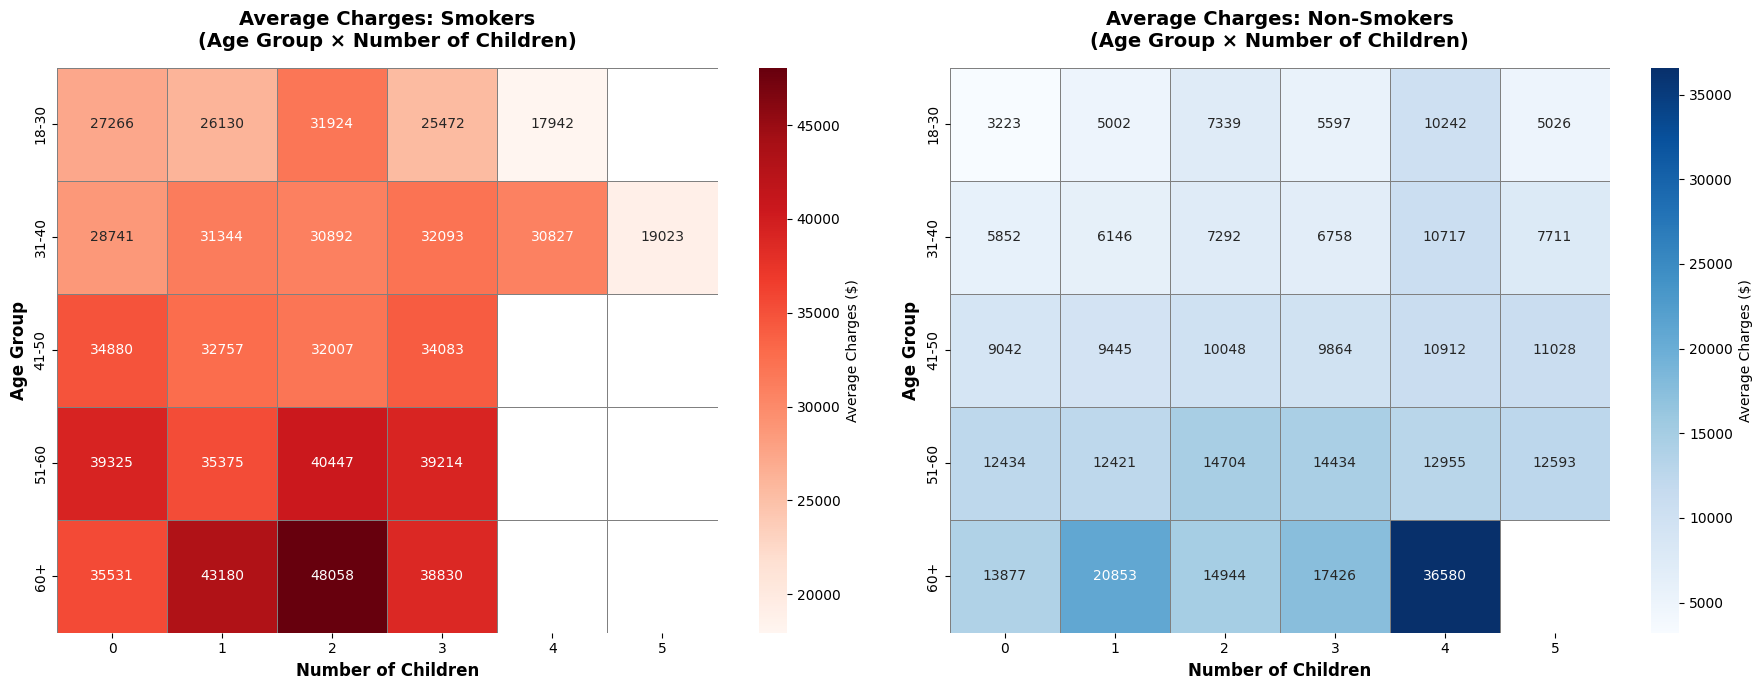

Heatmap data summary:

Smokers - Min: $17,942, Max: $48,058
Non-Smokers - Min: $3,223, Max: $36,580


In [25]:
# Creative Plot 3: Heatmap - Charges by Age Group, Children, and Smoking Status
if 'df' in locals() and not df.empty:
    # Create age groups
    df['AgeGroup'] = pd.cut(df['age'], 
                            bins=[0, 30, 40, 50, 60, 100],
                            labels=['18-30', '31-40', '41-50', '51-60', '60+'])
    
    # Create pivot table: Age Group vs Children, colored by average charges
    pivot_data = df.groupby(['AgeGroup', 'children', 'smoker'])['charges'].mean().reset_index()
    
    # Create heatmap for smokers
    pivot_smoker = pivot_data[pivot_data['smoker'] == 'yes'].pivot(
        index='AgeGroup', columns='children', values='charges'
    )
    
    # Create heatmap for non-smokers
    pivot_non_smoker = pivot_data[pivot_data['smoker'] == 'no'].pivot(
        index='AgeGroup', columns='children', values='charges'
    )
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
    # Smokers heatmap
    sns.heatmap(pivot_smoker, annot=True, fmt='.0f', cmap='Reds', ax=ax1,
                cbar_kws={'label': 'Average Charges ($)'}, linewidths=0.5, linecolor='gray')
    ax1.set_title('Average Charges: Smokers\n(Age Group × Number of Children)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax1.set_xlabel('Number of Children', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Age Group', fontsize=12, fontweight='bold')
    
    # Non-smokers heatmap
    sns.heatmap(pivot_non_smoker, annot=True, fmt='.0f', cmap='Blues', ax=ax2,
                cbar_kws={'label': 'Average Charges ($)'}, linewidths=0.5, linecolor='gray')
    ax2.set_title('Average Charges: Non-Smokers\n(Age Group × Number of Children)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax2.set_xlabel('Number of Children', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Age Group', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("Heatmap data summary:")
    print(f"\nSmokers - Min: ${pivot_smoker.min().min():,.0f}, Max: ${pivot_smoker.max().max():,.0f}")
    print(f"Non-Smokers - Min: ${pivot_non_smoker.min().min():,.0f}, Max: ${pivot_non_smoker.max().max():,.0f}")


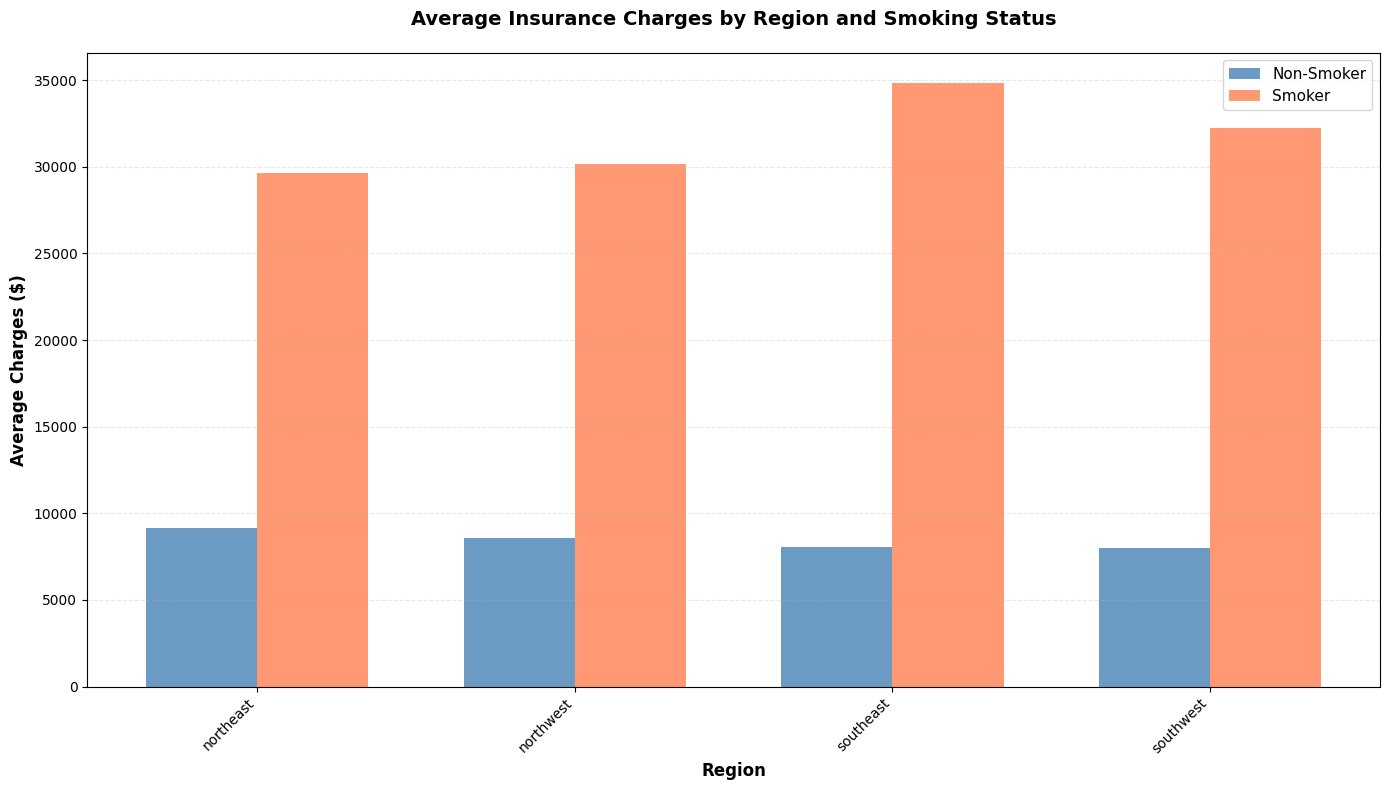

Average charges by region and smoking status:
smoker              no           yes
region                              
northeast  9165.531672  29673.536473
northwest  8556.463715  30192.003182
southeast  8032.216309  34844.996824
southwest  8019.284513  32269.063494

Smoker premium: 31744.90
Non-smoker premium: 8443.37
Smoker premium is 3.76x higher


In [26]:
# Creative Plot 1: Average Charges by Region (with smoker overlay)
if 'df' in locals() and not df.empty:
    plt.figure(figsize=(14, 8))
    
    # Group by region and smoker status
    region_smoker = df.groupby(['region', 'smoker'])['charges'].mean().unstack()
    
    x = np.arange(len(region_smoker.index))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, region_smoker['no'], width, label='Non-Smoker', 
                    color='steelblue', alpha=0.8)
    bars2 = plt.bar(x + width/2, region_smoker['yes'], width, label='Smoker', 
                    color='coral', alpha=0.8)
    
    plt.xlabel('Region', fontsize=12, fontweight='bold')
    plt.ylabel('Average Charges ($)', fontsize=12, fontweight='bold')
    plt.title('Average Insurance Charges by Region and Smoking Status', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xticks(x, region_smoker.index, rotation=45, ha='right')
    plt.legend(fontsize=11)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    print("Average charges by region and smoking status:")
    print(region_smoker)
    print(f"\nSmoker premium: {region_smoker['yes'].mean():.2f}")
    print(f"Non-smoker premium: {region_smoker['no'].mean():.2f}")
    print(f"Smoker premium is {region_smoker['yes'].mean() / region_smoker['no'].mean():.2f}x higher")


## Hypothesis Testing

Perform hypothesis tests to identify low-risk groups.


In [28]:
from scipy import stats

# Hypothesis Test 1: Smokers vs Non-Smokers charges
if 'df' in locals() and not df.empty:
    print("=" * 60)
    print("HYPOTHESIS TEST 1: Smokers vs Non-Smokers")
    print("=" * 60)
    
    smoker_charges = df[df['smoker'] == 'yes']['charges']
    non_smoker_charges = df[df['smoker'] == 'no']['charges']
    
    if len(smoker_charges) > 0 and len(non_smoker_charges) > 0:
        t_stat, p_value = stats.ttest_ind(smoker_charges, non_smoker_charges)
        print(f"Null Hypothesis: No difference in charges between smokers and non-smokers")
        print(f"T-statistic: {t_stat:.4f}")
        print(f"P-value: {p_value:.2e}")
        print(f"Significant (p < 0.05): {p_value < 0.05}")
        print(f"\nSmoker mean charges: ${smoker_charges.mean():,.2f}")
        print(f"Non-smoker mean charges: ${non_smoker_charges.mean():,.2f}")
        print(f"Difference: ${smoker_charges.mean() - non_smoker_charges.mean():,.2f}")
        print(f"Smokers pay {smoker_charges.mean() / non_smoker_charges.mean():.2f}x more")
    
    print("\n" + "=" * 60)
    print("HYPOTHESIS TEST 2: Charges by Region")
    print("=" * 60)
    
    # Test if there's significant difference between regions
    regions = df['region'].unique()
    if len(regions) >= 2:
        region_charges = [df[df['region'] == reg]['charges'] for reg in regions]
        
        # ANOVA test
        f_stat, p_value = stats.f_oneway(*region_charges)
        print(f"Null Hypothesis: No difference in charges across regions")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"P-value: {p_value:.4f}")
        print(f"Significant (p < 0.05): {p_value < 0.05}")
        
        print("\nMean charges by region:")
        for reg in regions:
            reg_mean = df[df['region'] == reg]['charges'].mean()
            print(f"  {reg}: ${reg_mean:,.2f}")
        
        # Pairwise comparison: lowest vs highest
        region_means = df.groupby('region')['charges'].mean().sort_values()
        lowest_region = region_means.index[0]
        highest_region = region_means.index[-1]
        
        lowest_data = df[df['region'] == lowest_region]['charges']
        highest_data = df[df['region'] == highest_region]['charges']
        
        t_stat, p_value = stats.ttest_ind(lowest_data, highest_data)
        print(f"\nPairwise: {lowest_region} (lowest) vs {highest_region} (highest)")
        print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
        print(f"Significant: {p_value < 0.05}")
    
    print("\n" + "=" * 60)
    print("LOW-RISK GROUP IDENTIFICATION")
    print("=" * 60)
    
    # Identify low-risk groups (low charges)
    print("\nGroups with lowest average charges:")
    low_risk = df.groupby(['region', 'smoker', 'sex'])['charges'].agg(['mean', 'count']).reset_index()
    low_risk = low_risk.sort_values('mean').head(10)
    low_risk.columns = ['Region', 'Smoker', 'Sex', 'Avg_Charges', 'Sample_Size']
    print(low_risk.to_string(index=False))


HYPOTHESIS TEST 1: Smokers vs Non-Smokers
Null Hypothesis: No difference in charges between smokers and non-smokers
T-statistic: 46.6649
P-value: 8.27e-283
Significant (p < 0.05): True

Smoker mean charges: $32,050.23
Non-smoker mean charges: $8,434.27
Difference: $23,615.96
Smokers pay 3.80x more

HYPOTHESIS TEST 2: Charges by Region
Null Hypothesis: No difference in charges across regions
F-statistic: 2.9696
P-value: 0.0309
Significant (p < 0.05): True

Mean charges by region:
  southwest: $12,346.94
  southeast: $14,735.41
  northwest: $12,417.58
  northeast: $13,406.38

Pairwise: southwest (lowest) vs southeast (highest)
T-statistic: -2.4282, P-value: 0.0154
Significant: True

LOW-RISK GROUP IDENTIFICATION

Groups with lowest average charges:
   Region Smoker    Sex  Avg_Charges  Sample_Size
southeast     no   male  7609.003587          134
southwest     no   male  7778.905534          126
southwest     no female  8234.091260          141
northwest     no   male  8320.689321       

## Summary

Document your findings and insights here.
